In [2]:
from selenium import webdriver as wd
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# 각각의 플랫폼에 따른 폰트 설정을 위해서
import platform     # 플랫폼 관련 라이브러리
import time

if platform.system() == 'Windows':
    path = "C:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family = font_name)
elif platform.system() == 'Darwin':
    rc('font',family='AppleGothic')
else :
    print('check your OS System')

In [110]:
## 인스타그램 로그인
## chromedriver 실행
driver = wd.Chrome("c:\webdriver\chromedriver.exe")
url = "https://www.instagram.com/"
driver.get(url)
time.sleep(5)
id = "ojy033@naver.com"
pw = "dhwndud951753!"
u_id = driver.find_element_by_name('username')
u_id.clear()
u_id.send_keys(id)
u_pw = driver.find_element_by_name('password')
u_pw.clear()
u_pw.send_keys(pw)
driver.find_element_by_css_selector('#loginForm > div > div:nth-child(3) > button').click()
time.sleep(5)
driver.find_element_by_css_selector('#react-root > section > main > div > div > div > div > button').click()
time.sleep(5)
driver.find_element_by_css_selector('body > div.RnEpo.Yx5HN > div > div > div > div.mt3GC > button.aOOlW.HoLwm').click()

C:\Users\user\AppData\Local\Temp\ipykernel_8088\3546562527.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = wd.Chrome("c:\webdriver\chromedriver.exe")
C:\Users\user\AppData\Local\Temp\ipykernel_8088\3546562527.py:9: DeprecationWarning: find_element_by_name is deprecated. Please use find_element(by=By.NAME, value=name) instead
  u_id = driver.find_element_by_name('username')
C:\Users\user\AppData\Local\Temp\ipykernel_8088\3546562527.py:12: DeprecationWarning: find_element_by_name is deprecated. Please use find_element(by=By.NAME, value=name) instead
  u_pw = driver.find_element_by_name('password')
C:\Users\user\AppData\Local\Temp\ipykernel_8088\3546562527.py:15: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.find_element_by_css_selector('#loginForm > div > div:nth-child(3) > button').click()
C:\Users\user\AppData\Local\Temp\ipykernel_

In [105]:
### 인스타그램의 검색 결과 url을 반환하는 함수
def insta_search(word):
    url = "https://instagram.com/explore/tags/"+word
    return url

word = "제주도맛집"
url = insta_search(word)
driver.get(url)


In [134]:
### 첫번째 게시물을 찾아 클릭
def select_first(driver):
    first = driver.find_element_by_css_selector('div._9AhH0')
    first.click()
    time.sleep(4)

select_first(driver)

C:\Users\user\AppData\Local\Temp\ipykernel_8088\923924382.py:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector('div._9AhH0')


In [114]:
# 게시글 정보 가져오기
import re
import unicodedata

def get_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    ## 본문내용 가져오기
    try:
        content = soup.select('div.C4VMK > div > span')[0].text
        content = unicodedata.normalize('NFC', content)
    except:
        content = ' '

    ## 본문내용에서 해시태그 가져오기
    tags = re.findall(r'#[^\s#,\\]+', content)

    ## 작성일자 정보 가져오기
    date = soup.select('time.FH9sR.RhOlS')[0]['datetime'][:10]

    ## 좋아요 수 가져오기
    try:
        like = soup.select('div._7UhW9.xLCgt.qyrsm.KV-D4.fDxYl.T0kll > span')[0].text
    except:
        like = 0
        
    ## 위치정보 알아오기
    try:
        place = soup.select('a.O4GlU')[0].text
        place = unicodedata.normalize('NFC', place)
    except:
        place = ''
    data = [content, date, like, place,tags]
    return data
get_content(driver)

['제주 공항에서 가깝고 (🚗공항에서 12분)오션뷰& 노을뷰를 보면서 먹을 수 있는 💙삼미횟집💙 싱싱한 회는 물론이고사이드가 다양하게 손님들 모시고 오기 딱이야 🤭⛲삼미 돔모듬-대⛲-회국수 -전복,삼겹살,새우구이-삼계탕- 다양한 해산물 모듬 2판- 해물난장-성게 미역국-생선구이 2종 -매운탕등 ~ 너무 많아서 나열하기 어려운 정도! 🤪가게도 총 3층으로 룸이 나눠져 있으니깐 편하고 프라이빗하게 ~✌🧭삼미횟집제주 제주시 도두항서5길 1064-713-6400#제주도맛집#제주맛집#제주도횟집#제주시횟집#제주공항근처횟집#제주시내횟집#용두암근처맛집#용두암맛집#제주횟집추천#제주도공항근처횟집#도두맛집#이호테우해변맛집#제주공항맛집',
 '2022-05-19',
 0,
 '',
 ['#제주도맛집',
  '#제주맛집',
  '#제주도횟집',
  '#제주시횟집',
  '#제주공항근처횟집',
  '#제주시내횟집',
  '#용두암근처맛집',
  '#용두암맛집',
  '#제주횟집추천',
  '#제주도공항근처횟집',
  '#도두맛집',
  '#이호테우해변맛집',
  '#제주공항맛집']]

In [94]:
## 다음 게시글 열기
def move_next(driver):
    right = driver.find_element_by_css_selector('div.l8mY4.feth3 > button.wpO6b')
    right.click()
    time.sleep(4)

move_next(driver)

C:\Users\user\AppData\Local\Temp\ipykernel_8088\2969674790.py:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  right = driver.find_element_by_css_selector('div.l8mY4.feth3 > button.wpO6b')


In [ ]:
### 여러개 게시글 정보 수집하기 순서
# 1. 크롬 브라우저 열기
# 2. 인스타그램 검색 페이지 url 정보 만들기 : insta_searching()
# 3. 검색페이지 접속하기
# 4. 첫번째 게시물 클릭하기
# 5. 비어있는 변수(result) 만들기
# 6. 게시글 정보 가져오기 : get_content(0)
# 7. 게시글 정보를 변수(result)에 추가하기
# 8. 다음 게시글 선택하기 : move_next()
# 9. 게시글 50개 정도 크롤링 후 저장 -> 수집 완료
# 10. 수집데이터 저장(1_crawling_jejuMatJip.xlsx)

In [141]:
from selenium import webdriver as wd
from bs4 import BeautifulSoup
import time
import re

# 1
driver = wd.Chrome("C:\webdriver\chromedriver.exe")
url = "https://www.instagram.com/"
driver.get(url)
time.sleep(5)
id = "ojy033@naver.com"
pw = "dhwndud951753!"
u_id = driver.find_element_by_name('username')
u_id.clear()
u_id.send_keys(id)
u_pw = driver.find_element_by_name('password')
u_pw.clear()
u_pw.send_keys(pw)
driver.find_element_by_css_selector('#loginForm > div > div:nth-child(3) > button').click()
time.sleep(5)
driver.find_element_by_css_selector('#react-root > section > main > div > div > div > div > button').click()
time.sleep(5)
driver.find_element_by_css_selector('body > div.RnEpo.Yx5HN > div > div > div > div.mt3GC > button.aOOlW.HoLwm').click()



C:\Users\user\AppData\Local\Temp\ipykernel_8088\658246120.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = wd.Chrome("C:\webdriver\chromedriver.exe")
C:\Users\user\AppData\Local\Temp\ipykernel_8088\658246120.py:13: DeprecationWarning: find_element_by_name is deprecated. Please use find_element(by=By.NAME, value=name) instead
  u_id = driver.find_element_by_name('username')
C:\Users\user\AppData\Local\Temp\ipykernel_8088\658246120.py:16: DeprecationWarning: find_element_by_name is deprecated. Please use find_element(by=By.NAME, value=name) instead
  u_pw = driver.find_element_by_name('password')
C:\Users\user\AppData\Local\Temp\ipykernel_8088\658246120.py:19: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.find_element_by_css_selector('#loginForm > div > div:nth-child(3) > button').click()
C:\Users\user\AppData\Local\Temp\ipykernel_808

In [ ]:
# 2
word = "제주도맛집"
url = insta_search(word)

# 3
driver.get(url)
time.sleep(4)
# 4
#select_first(driver)

# 5 
results = []
target = 50
for i in range(target):
    try:
        results.append(get_content(driver))
        move_next(driver)
        time.sleep(2)
    except:
        time.sleep(3)
        move_next(driver)
results

In [127]:
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'like','place', 'tags']
results_df.to_excel('data/1_crawling_jejudoMatJip.xlsx',index=False)

In [137]:
### 제주여행 제주관광 제주맛집
# 2
word = "제주여행"
url = insta_search(word)

# 3
driver.get(url)
time.sleep(4)


In [138]:
# 4
select_first(driver)

# 5 
results = []
target = 50
for i in range(target):
    try:
        results.append(get_content(driver))
        move_next(driver)
        time.sleep(2)
    except:
        time.sleep(3)
        move_next(driver)
results

C:\Users\user\AppData\Local\Temp\ipykernel_8088\923924382.py:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector('div._9AhH0')


[["제주에서만 먹을 수 있는 디저트.jpg현무암 스콘으로 난리났던 '딜레탕트'사실 딱새우, 흑돼지 키슈가 레전드임...ㄷㄷㄷㄷㄷㄷㄷㄷ출처: @travelseasia.kr @dilettante.jeju#제주카페 #딜레탕트 #동행스타그램",
  '2022-05-20',
  '678',
  '제주도',
  ['#제주카페', '#딜레탕트', '#동행스타그램']],
 ['#제주수국명소솜사탕처럼 몽글몽글 사랑스러운#제주수국다들 여행 준비하셨나요? ✈️저도 담달 수국 만날 생각에 두근두근💕갔던 곳 중 예뻤던 장소 소개할께요!! ⠀ 1️⃣ 윈드1947 테마파크- 알록달록 수국이 한가득. 수국 속으로 퐁당 빠져보세요.🚗 제주 서귀포시 토평동 17992️⃣ 이스틀리 카페- 동화 속에 나올거 같은 큰 나무와 수국동산, 정원이 넓어 인생샷 가득!!🚗 제주 서귀포시 성산읍 산성효자로 114번지길3️⃣ 보롬왓- 새로 단장한 수국길과 수국호수는 보자마자 감탄!! 🚗 제주 서귀포시 표선면 번영로 2350-1044️⃣ 혼인지- 수국길과 돌담, 전통적인 느낌까지 다양하게 즐길 수 있는 곳🚗 제주 서귀포시 성산읍 혼인지로 39-225️⃣ 카멜리아힐- 원조 수국 맛집!! 비가 온다면 꼭 가봐야하는 곳.안개가 잘 껴서 몽환적인 모습을 볼 수 있어요.🚗 제주 서귀포시 안덕면 병악로 1666️⃣ 카페 글렌코- 비 피할려고 갔다가 홀딱 반했던.. 핑크뮬리 맛집인 줄 알았는데 수국맛집!!🚗 제주 제주시 구좌읍 비자림로 12027️⃣ 안성리 수국길- 보라색 수국 돌담과 아기자기한 마을🚗 제주 서귀포시 대정읍 안성리 9988️⃣ 안덕면사무소- 파스텔 수국들이 가득, 파란하늘과 함께 담으면 너무 예쁜 곳🚗 제주 서귀포시 안덕면 화순서서로 749️⃣ 동광리 수국길- 쭉 뻗은 수국길과 높은 수국벽이 예쁜 곳, 보라빛 수국벽에서 인증샷은 필수!!🚗 제주 서귀포시 안덕면 신화역사로 669🔟 남국사- 수국과 나무길이 예쁜 곳. 걷기만해도 힐링🚗 제주 제주시 중앙로 738-16⠀ ✔️저장 꾸욱~ 예쁜 수국 보고 오세요

In [139]:
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'like','place', 'tags']
results_df.to_excel('data/1_crawling_jejudoYeoHaeng.xlsx',index=False)

In [143]:
# # 2
# word = "제주관광"
# url = insta_search(word)

# # 3
# driver.get(url)
# time.sleep(4)

# 4
select_first(driver)

# 5 
results = []
target = 50
for i in range(target):
    try:
        results.append(get_content(driver))
        move_next(driver)
        time.sleep(2)
    except:
        time.sleep(3)
        move_next(driver)
results

C:\Users\user\AppData\Local\Temp\ipykernel_8088\923924382.py:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector('div._9AhH0')


[['#소소한제주살이#금악오름 겨울에 금오름을 처음 올라가본다. 겨울같지 않은 날씨에 어색해서 겉옷을 벗어 던졌다. 가을인가 겨울인가 이건 늦가을이 맞네제주 살이 너무 행복한거 아니냐구 ㅜ',
  '2022-03-13',
  0,
  '금악오름',
  ['#소소한제주살이', '#금악오름']],
 ['물의 화백이 남기고 간 안식처 💧김창열미술관은 제주도에 있는 전시관 중 그리 유명한 곳은 아닙니다. 관광객들은 근처의 본태 박물관, 수풍석 뮤지엄에 몰리고 이곳까지는 잘 안 와요. 하지만 이 근방의 전시관 중 가장 마음이 평온해지는 곳은 단연 여기입니다."물방울을 그리는 행위는 모든 것을 투명하게 무(無)로 되돌려 보내기 위한 것이다. 분노도 불안도 공포도 모든 것을 허(虛)로 돌릴 때 우리들은 평안과 평화를 체험하게 될 것이다."고 김창열 화백은 물방울을 그림으로써 불순한 것을 무와 허로 돌리려고 했습니다. 이곳엔 그의 물방울 작품이 수십 점 전시되어 있고요. 화백의 취지대로 작품을 감상할 수 있도록 공간 설계가 세밀하게 고려되어 있어요. 의도적으로 조명을 어둡게 한 복도를 거닌 후 영롱한 물방울을 만나게 하는 동선, 작품을 쭉 감상한 후 옥상으로 올라가는 길에 마주하게 되는 힘찬 분수까지. 이곳에 방문한다면 이상적인 감상을 자연스럽게 유도하는 공간 설계에 걸음을 맡기게 될 거예요. 자연이 아님에도 숨을 크게 들이마시는 동안 기분이 상쾌해지고, 미술관에 머물고 나오니 사람들이 잘 찾지 않는 서늘한 계곡을 다녀온 듯했습니다. 화백의 의도대로 마음의 불순물이 무와 허로 돌아갔기 때문일까요. 👨🏻\u200d🎨 김창열미술관• 제주시 한림읍 용금로 883-5• 관람 시간 : 화~일 오전 9시 ~ 오후 6시• 공식 홈페이지에서 관람 예약 권장👉 반복되는 일상에 리프레시가 필요할 때,@blimp.space 팔로우하고 매일 새로운 공간을 받아보세요.Photograph | @kimtschangyeulartmuseum @ps.p1ck_ @sangminjjikda #김창열미술관 #김

In [144]:
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'like','place', 'tags']
results_df.to_excel('data/1_crawling_jejudoGwanGwang.xlsx',index=False)

In [147]:
# # 2
# word = "제주맛집"
# url = insta_search(word)

# # 3
# driver.get(url)
# time.sleep(4)

# 4
select_first(driver)

# 5 
results = []
target = 50
for i in range(target):
    try:
        results.append(get_content(driver))
        move_next(driver)
        time.sleep(2)
    except:
        time.sleep(3)
        move_next(driver)
results

C:\Users\user\AppData\Local\Temp\ipykernel_8088\923924382.py:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector('div._9AhH0')


[['.💖서귀포 "돗통"💖여기가 그 아이돌티켓팅보다 힘든예약의 난이도를 가지고있는 맛집이래..!👐하지만 예약성공을 하면 그만한 보람이 크으~야외에서 커~다란 솥에 고기구워먹고 좌글좌글한 기름에 김치까지..이건 먹어봐야 아는맛이라구!!@얼른 티켓팅 잘하는 친구들 불러봐!!!📌서귀포시 안덕면 사계북로41번길 189..#제주맛집 #제주도맛집 #제주공항근처맛집 #제주시맛집 #애월맛집 #중문맛집 #제주공항맛집 #서귀포맛집 #산방산맛집 #신제주맛집 #제주시청맛집 #제주애월맛집 #월정리맛집 #제주여행 #제주핫플',
  '2022-05-19',
  '1,082',
  '',
  ['#제주맛집',
   '#제주도맛집',
   '#제주공항근처맛집',
   '#제주시맛집',
   '#애월맛집',
   '#중문맛집',
   '#제주공항맛집',
   '#서귀포맛집',
   '#산방산맛집',
   '#신제주맛집',
   '#제주시청맛집',
   '#제주애월맛집',
   '#월정리맛집',
   '#제주여행',
   '#제주핫플']],
 ['진심으로 추천해주고 싶은활어회맛집 "노형수산시장"서울의 노량진수산시장이 있다면제주도엔 노형수산시장이 있다!!제주도에서 가장큰 규모의 횟집👍제주도에서 가장 저렴한 횟집👍활어회부터 해산물,대게,구이류까지모든 바다의맛이 한곳에!😍밤에는 포장마차 감성의 야외테라스에서 즐길수있고❤깔끔한 포장으로 언제어디서나즐길수 있는~🥂오늘은 이곳에서 소주각Go👉👉🧭노형수산시장주소 : 제주 제주시 한라대학로 7전화 : 064-745-8822영업시간 : 매일 14:00 ~ 새벽 02:00  새벽 01:00 라스트오더#제주맛집#제주도맛집#제주공항근처횟집#제주횟집#제주도횟집#제주시횟집#제주회포장#제주도회포장#제주횟집추천#노형동맛집#연동맛집#드림타워맛집#이호테우해변맛집',
  '2022-05-19',
  0,
  '',
  ['#제주맛집',
   '#제주도맛집',
   '#제주공항근처횟집',
   '#제주횟집',
   '#제주도횟집',
   '#제주시횟집',
   '#제주회포장',


In [148]:
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'like','place', 'tags']
results_df.to_excel('data/1_crawling_jejuMatJib.xlsx',index=False)

In [3]:
## 여러개의 저장파일을 통합(jeju_instar_df)

folder = 'data/'
f_list = ['1_crawling_jejudoMatJip.xlsx', '1_crawling_jejuMatJip.xlsx','1_crawling_jejuGwanGwang.xlsx','1_crawling_jejuYeoHaeng.xlsx']
jeju_instar_df = pd.DataFrame([])
for fname in f_list:
    fpath = folder+fname
    temp = pd.read_excel(fpath)
    jeju_instar_df = jeju_instar_df.append(temp)

C:\Users\user\AppData\Local\Temp\ipykernel_13792\2220521005.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_instar_df = jeju_instar_df.append(temp)
C:\Users\user\AppData\Local\Temp\ipykernel_13792\2220521005.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_instar_df = jeju_instar_df.append(temp)
C:\Users\user\AppData\Local\Temp\ipykernel_13792\2220521005.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_instar_df = jeju_instar_df.append(temp)
C:\Users\user\AppData\Local\Temp\ipykernel_13792\2220521005.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_instar_df = jeju_instar_df.append(temp)


In [156]:
jeju_instar_df.head()
jeju_instar_df.drop_duplicates(subset=['content'], inplace=True)
jeju_instar_df.to_excel('data/1_crawling_raw.xlsx', index=False)

In [4]:
### 크롤링 결과 중 해시태그 데이터 불러오기
import pandas as pd
raw_total = pd.read_excel('data/1_crawling_raw.xlsx')
raw_total['tags'][:5]

0    ['#제주맛집', '#제주도맛집', '#제주공항근처맛집', '#제주시맛집', '#애...
1    ['#제주도맛집', '#신제주맛집', '#연동맛집', '#제주공항맛집', '#제주도...
2    ['#제주가볼만한곳', '#제주데이트', '#제주메밀꽃', '#제주핫플', '#제주...
3    ['#제주맛집', '#제주도맛집', '#제주공항근처맛집', '#제주시맛집', '#애...
4    ['#제주도맛집', '#제주맛집', '#제주도횟집', '#제주시횟집', '#제주공항...
Name: tags, dtype: object

In [5]:
### 워드 클라우드
## 수집한 데이터 중에 해시태그 정보들을 클라우드로 시각화
## 워드 클라우드는 텍스트 내에 출현하는 단어들의 출현 빈도수에 비례하여 크기로 표출한 그래프

## 해시태그 통합 저장
tags_total = []
for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)
# raw_total['tags'][0]  # 리스트가 아니라 문자열
# tags_list = tags[2:-2].split("', '")      # 문자열에 맨끝에 대괄호를 삭제한 후 리스트로 반환

In [6]:
## 해시태그 빈도수 집계
from collections import Counter     # Counter() 함수는 그룹내 원소의 종류별로 빈도수계산

tag_counts = Counter(tags_total)
tag_counts.most_common(100)


[('#제주여행', 60),
 ('#제주맛집', 54),
 ('#제주도맛집', 38),
 ('', 29),
 ('#제주', 27),
 ('#제주도여행', 26),
 ('#제주관광', 25),
 ('#제주가볼만한곳', 24),
 ('#제주도', 22),
 ('#제주핫플', 17),
 ('#서귀포맛집', 15),
 ('#제주카페', 14),
 ('#애월맛집', 11),
 ('#제주공항맛집', 11),
 ('#여행스타그램', 11),
 ('#jeju', 10),
 ('#제주시맛집', 9),
 ('#중문맛집', 8),
 ('#제주도카페', 8),
 ('#노형동맛집', 7),
 ('#제주여행추천', 7),
 ('#제주도가볼만한곳', 7),
 ('#여행', 7),
 ('#제주공항근처맛집', 6),
 ('#신제주맛집', 6),
 ('#제주맛집추천', 6),
 ('#좋아요', 6),
 ('#jejuisland', 6),
 ('#제주도민맛집', 6),
 ('#서귀포', 6),
 ('#서귀포카페', 6),
 ('#제주여행코스', 6),
 ('#산방산맛집', 5),
 ('#제주시청맛집', 5),
 ('#제주애월맛집', 5),
 ('#월정리맛집', 5),
 ('#연동맛집', 5),
 ('#제주핫플레이스', 5),
 ('#제주카페추천', 5),
 ('#일상', 5),
 ('#제주흑돼지', 5),
 ('#제주관광지', 5),
 ('#성산맛집', 4),
 ('#국내여행', 4),
 ('#제주흑돼지맛집', 4),
 ('#협재맛집', 4),
 ('#제주데이트코스', 4),
 ('#제주맘', 4),
 ('#수월봉', 4),
 ('#제주스타그램', 4),
 ('#애월', 4),
 ('#제주숙소', 4),
 ('#한림공원', 4),
 ('#가족여행', 4),
 ('#이호테우해변맛집', 3),
 ('#먹스타그램', 3),
 ('#함덕맛집', 3),
 ('#제주살이', 3),
 ('#먹스타맞팔', 3),
 ('#제주바다', 3),
 ('#오설록', 3),
 ('#제주소품샵', 3),
 ('#제주도흑

In [7]:
## 데이터 정제
STOPWORD = ['#제주도','#제주','','#jeju','#선팔맞팔','#제주맘','#일상','#먹스타맞팔','#좋아요','#키니샵','먹스타그램맞팔']
tags_total_selected = []
for tag in tags_total:
    if tag not in STOPWORD:
        tags_total_selected.append(tag)
tag_counts_selected = Counter(tags_total_selected)
tag_counts_selected

Counter({'#제주맛집': 54,
         '#제주도맛집': 38,
         '#제주공항근처맛집': 6,
         '#제주시맛집': 9,
         '#애월맛집': 11,
         '#중문맛집': 8,
         '#제주공항맛집': 11,
         '#서귀포맛집': 15,
         '#산방산맛집': 5,
         '#신제주맛집': 6,
         '#제주시청맛집': 5,
         '#제주애월맛집': 5,
         '#월정리맛집': 5,
         '#제주여행': 60,
         '#제주핫플': 17,
         '#연동맛집': 5,
         '#제주도공항근처맛집': 2,
         '#제주노형동맛집': 1,
         '#제원맛집': 1,
         '#누웨마루거리맛집': 1,
         '#제주공항주변맛집': 1,
         '#노형동맛집': 7,
         '#제주연동맛집': 2,
         '#제주공항흑돼지': 1,
         '#제주공항갈비': 1,
         '#제주가볼만한곳': 24,
         '#제주데이트': 2,
         '#제주메밀꽃': 2,
         '#제주도횟집': 2,
         '#제주시횟집': 2,
         '#제주공항근처횟집': 2,
         '#제주시내횟집': 1,
         '#용두암근처맛집': 1,
         '#용두암맛집': 1,
         '#제주횟집추천': 2,
         '#제주도공항근처횟집': 1,
         '#도두맛집': 1,
         '#이호테우해변맛집': 3,
         '#여행다녀왔습니다[🧡': 1,
         '#여행다녀왔습니다': 2,
         '#제주맛집추천': 6,
         '#성산맛집': 4,
         '#구좌맛집': 1,
         

In [8]:
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags','counts']
tag_counts_df

,tags,counts
0,#제주여행,60
1,#제주맛집,54
2,#제주도맛집,38
3,#제주도여행,26
4,#제주관광,25
5,#제주가볼만한곳,24
6,#제주핫플,17
7,#서귀포맛집,15
8,#제주카페,14
9,#애월맛집,11


<AxesSubplot:xlabel='counts', ylabel='tags'>

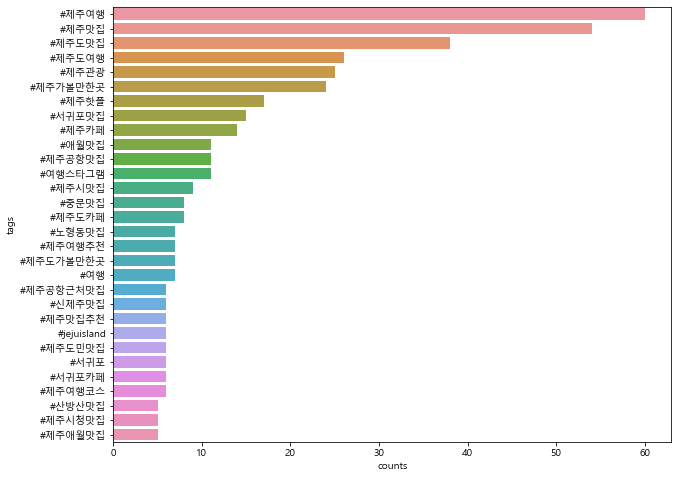

In [9]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.barplot(x='counts',y='tags',data=tag_counts_df)

In [12]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


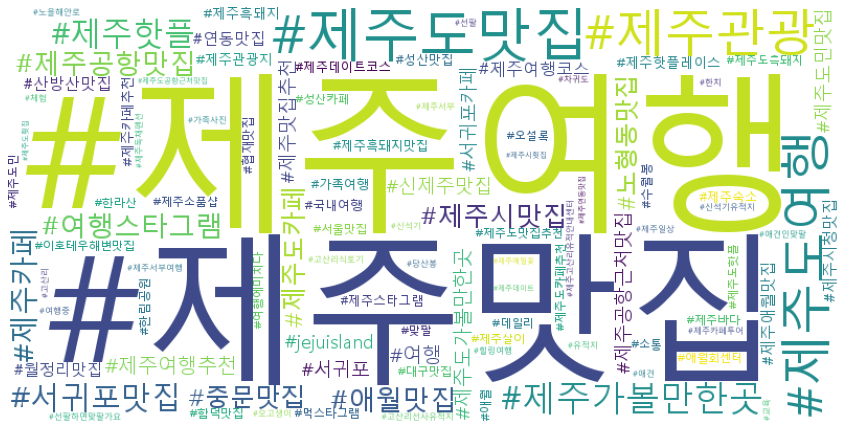

In [13]:
## 워드클라우드 그리기
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

wordcloud = WordCloud(font_path=path,background_color='white',max_words=100,relative_scaling=0.3,width=800,height=400).generate_from_frequencies(tag_counts_selected)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('data/2_tag-wordcloud.png')